# _Data Analysis of TV Shows and Movies listings on Netflix_


# Project Plan

## The Data

The Netflix listing data for TV Shows and Movies is obtained from Kaggle (URL: https://www.kaggle.com/shivamb/netflix-shows). The dataset consists of one '.csv' file.

The data was collected and uploaded by a Kaggle user who had joined the platform 3 years ago. The user has uploaded a total of 12 datasets till date. The dataset for Netflix was first uploaded on Dec 4, 2019 and has been updated multiple times since then. The latest version on which the analysis has been performed was updated on Jan 18, 2021. The dataset has a usability index of 10 as defined by Kaggle. 

The dataset consists of Netflix data, added to the platform from Jan 1, 2008 to Jan 16, 2021. The dataset consists of 12 columns and 7787 rows. The columns are as follows:
-  <b>show_id</b> - Unique ID for every TV Show/Movie
-  <b>type</b> - Identifier for TV Show or Movie. Has only 2 values
-  <b>title</b> - Title of the TV Show/Movie
-  <b>director</b> - Director of the TV Show/Movie
-  <b>cast</b> - Actor/Actresses of the TV Show/Movie
-  <b>country</b> - Country where the TV Show/Movie was produced
-  <b>date_added</b> - Date the TV Show/Movie was added to Netflix
-  <b>release_year</b> - The year TV Show/Movie was actually released
-  <b>rating</b> - Content rating of the TV Show/Movie. Has a total of 14 values
-  <b>duration</b> - Total duration in number of seasons for TV Show and minutes for Movie
-  <b>listed_in</b> - Genre of the TV Show/Movie
-  <b>description</b> - Summary description of the TV Show/Movie

All of the above data will not be used in the analysis. Anything that will be deleted or modified as a part of data cleaning would be called out separately in the program code section.

There has been a continuous increase in the amount of new content that has been added to Netflix from 2008 to 2019. However, due to onset of COVID-19 in 2020, we have seen a small dip(~5%) in the new content being added as there were production delays due to the pandemic. One other interesting thing to note is that Netflix also has a lot of old content (around 12%) which was originally released prior to 2008 and is present on the platform.

## Project Aim and Objectives

The aim of the project is to analyse key characteristics and trends for TV Shows and Movies in the Netflix Dataset. Since I am from India and the dataset has around 12% values for content produced in India which is second only to US which is at 33%, I will be taking a deeper dive into the trends and characteritics for content produced in India. Below are the main steps I will pe performing:

__i.__ The dataset will be inspected for data quality issues and issues like missing values, outliers etc. will be handled.

__ii.__ The dataset will be classified into different classes according to their characteristics (e.g. TV Show vs Movie or different values in any other column) and key trends will be identified.

__iii.__ The dataset will be visualised in different ways via different graps and plots to represent key trends and characteristics.

### Specific Objective(s)

* __Objective 1:__ _Visual Representation of Key Characteristics and Trends of Netflix Dataset_
* __Objective 2:__ _Visual Representation of Key Characteristics and Trends of Netflix Dataset for India_

## System Design 

The system design is described in the below two sections:

### Architecture

Below diagram descibes the Architecture of the system design.


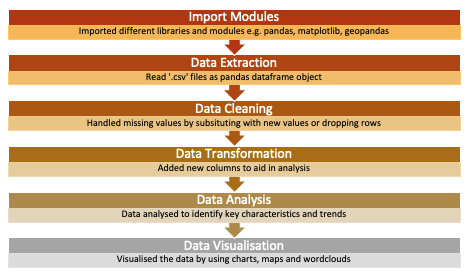

### Processing Modules and Algorithms

The data went through multiple processes as shown in the diagram above. Below is a detailed description of each step along with the alogrithms used and processing done.

-  <b>Import Modules</b> - Imported the below modules for the tasks as described.
    -  pandas - To convert ".csv" file to dataframe. The processing and analysis of data is easier in a dataframe
    -  matplotlib - To create colormap
    -  matplotlib.pyplot - To create different charts and graphs
    -  missingno - To analyse missing values in the dataset
    -  math - To perform mathematical functions like ceil to dataset
    -  squarify - To create square box plots
    -  numpy - To perform mathematical functions
    -  geopandas - To create worldmap
    -  country_converter - To convert from different standards and version of country names to ISO codes
    -  wordcloud - To create a wordcloud
    -  warnings - To remove the warnings appearing while code run from final output
    
-  <b>Data Extraction</b> - Obtained the "netflix.csv" file from Kaggle, and converted it into a pandas dataframe object for further processing and manipulation of data.

-  <b>Data Cleaning</b> - Analysed the dataset for missing values using missingno python library. For the missing values, either removed the data rows (by using notna) or substitued the dataset with appropriate values (by using fillna).

-  <b>Data Transformation</b> - Converted the date_added column to datetime format. Also extracted month name and year as separate columns from data_added column, to further help in analysis. Added the age_rating column to classify the content is appropriate for what age based on the column rating.

-  <b>Data Analysis</b> - Data is analysed to identify key characteristics and trends. For analysing the data for India, the dataframe is filtered for the content which is produced in India.

-  <b>Data Visualisation</b> - Data is converted into various graphs, charts, maps and wordcloud using the modules explained above.

# Program Code

### Importing libraries and module
Refer to the Processing Modules and Algorithms section to understand the purpose of importing these libraries and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno
import math
import squarify
import numpy as np
import geopandas as gpd
import country_converter as coco

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Data Extraction
The ".csv" file is converted into a pandas dataframe for further processing and analysis

In [2]:
df = pd.read_csv("netflix_titles.csv")
df[:2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...





### Data Cleaning
#### Below is the basic information of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are a total of 12 columns and 7787 rows in the data set. As per the output of above command it is noted that the
data is missing from 5 columns <b>director</b>, <b>cast</b>, <b>country</b>, <b>rating</b> and <b>date_added</b>. 

The data for column 'country' is missing for 507 rows(6.5% of data).
The data for column 'date_added' is missing for 10 rows(0.1% of data).

The column country and date_added are very important for analysis of key trends and characteristics, we dont want to impact the analysis by leaving these as blank or substituting with some other values, hence, we will be dropping the rows where these values are blank.

In [4]:
df = df[df['country'].notna()]
df = df[df['date_added'].notna()]

After removing the rows the dataset is now reduced to 7271 rows and 12 columns. Analysing the data to further identify characteristics of the data. We also have 3 column with missing values not handled.

In [5]:
df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7271,7271,7271,5193,6649,7271,7271,7271.000000,7265,7271,7271,7271
unique,7271,2,7271,3931,6468,681,1547,NaN,14,210,483,7263
top,s4959,Movie,Zindagi Gulzar Hai,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5147,1,18,18,2549,112,NaN,2702,1373,322,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.789025,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.856136,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#### Handling of Missing Value - Visualising the data in above table

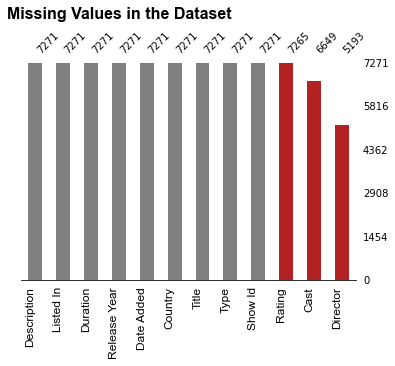

In [6]:
fig, ax = plt.subplots()

color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'firebrick', 'firebrick', 'firebrick']

msno.bar(df, fontsize = 10, color = color, sort = 'descending', ax = ax, figsize = (8,6))

labels = ['Description','Listed In','Duration', 'Release Year', 'Date Added', 'Country', 'Title', 'Type','Show Id','Rating', 'Cast','Director']
ax.set_xticklabels(labels, rotation = 90, font = 'arial',size = 12)
ax.text(-1,1.2,"Missing Values in the Dataset", font = 'arial',weight = 'bold', size = 16)
ax.set_yticklabels('')
ax.spines ['bottom'].set_visible (True)


Using the missingno library, plotted the above bar graph and noted that there are three columns that have missing values which are <b>director</b>, <b>cast</b> and <b>rating</b> in descending order. It is an important step to clean up this data and fix the missing values so that the further analysis that we perform is accurate.

We will be handling the null values as below:

-  director - Replace with value 'No Data'
-  cast - Replace with value 'No Data'
-  rating - Replace with mode of rating

In [7]:
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7271 non-null   object
 1   type          7271 non-null   object
 2   title         7271 non-null   object
 3   director      7271 non-null   object
 4   cast          7271 non-null   object
 5   country       7271 non-null   object
 6   date_added    7271 non-null   object
 7   release_year  7271 non-null   int64 
 8   rating        7271 non-null   object
 9   duration      7271 non-null   object
 10  listed_in     7271 non-null   object
 11  description   7271 non-null   object
dtypes: int64(1), object(11)
memory usage: 738.5+ KB


After performing the '.fillna' operation,  ran the info command again and noted that there are no missing values in the data. Hence, missing values have been handled successfully.

### Data Transformation

Converted the 'date_added' column to datetime format. Further created two new columns year_added and month_name_added to the dataframe. We will need these columns to perform further analysis.

In [9]:
#conversion to datetime datatype and addition of new columns for month name and year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_name_added'] = df['date_added'].dt.month_name()

For the column rating, there are 14 unique values (e.g. TV-14, TV-MA, PG, PG-13 etc). These ratings correspond to different age groups (e.g. Adults, Teens, Kids). We have added a new column (age_rating) to the dataframe and encoded the 14 ratings into age groups. For encoding the references were taken from Netflix help page: https://help.netflix.com/en/node/2064/us

In [10]:
#encoding the ratings to Kids+, Teens+ and Adults
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 
#creating a new column in data frame with age rating
df['age_rating'] = df['rating'].replace(to_replace = rating)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7271 non-null   object        
 1   type              7271 non-null   object        
 2   title             7271 non-null   object        
 3   director          7271 non-null   object        
 4   cast              7271 non-null   object        
 5   country           7271 non-null   object        
 6   date_added        7271 non-null   datetime64[ns]
 7   release_year      7271 non-null   int64         
 8   rating            7271 non-null   object        
 9   duration          7271 non-null   object        
 10  listed_in         7271 non-null   object        
 11  description       7271 non-null   object        
 12  year_added        7271 non-null   int64         
 13  month_name_added  7271 non-null   object        
 14  age_rating        7271 n

The dataset is now transformed to 15 columns and 7271 rows. All the analysis will now be performed on this dataset.

 ### Data Analysis and Data Visualisation

The dataset is analysed for the two objectives for different characteristics and trends. We will look at the code by each characteristic or trend analysed. 
Data Visualisation will be covered as a part of the Project Outcome section.

<b>1. Content Distribution - TV Shows & Movies </b>

In [12]:
#Function to calculate TV Show vs Movie percentages
def tvmov_contentdes(df1):
    count_movie_tv = df1['type'].value_counts()
    totalcount = len(df1)
    movie_tv_ratio = ((count_movie_tv/totalcount)).round(2)
    return movie_tv_ratio

<b>2. Rating Count for Each Age Group - Adult Only, Teens+ & Kids+ </b>

In [13]:
#code for calculating total value for each age group
age_ratings = df['age_rating'].value_counts()
age_ratings

Adults    3462
Teens     2175
Kids      1634
Name: age_rating, dtype: int64

<b>3. Rating Count for TV Shows & Movies for Each Age Group </b>

In [14]:
#code for calculating total value for each group, grouped by type 'TV Show' or 'Movie'
movietv_rating = df.groupby('type')['age_rating'].value_counts()
movietv_rating

type     age_rating
Movie    Adults        2520
         Teens         1599
         Kids          1028
TV Show  Adults         942
         Kids           606
         Teens          576
Name: age_rating, dtype: int64

<b>4. Content Released and Content Added to Netflix in a Year </b>

In [15]:
#Function to calculate the total count of titles released in a year and added to Netflix in a year
def rel_add_content (df1):
# counting the occurences for each year
    year_add = df1['year_added'].value_counts()
    release = df1['release_year'].value_counts()
# creating a dataframe
    add_df = pd.DataFrame({'year': year_add.index, 'year_added': year_add.values})
    release_df = pd.DataFrame({'year': release.index, 'release_year': release.values})

    year_df = pd.merge(add_df, release_df, how = 'right', on = 'year')
    year_df.fillna('0', inplace = True)
    year_df['year_added'] = year_df.year_added.astype('int')

    year_df = year_df.sort_values('year', ascending = False).reset_index(drop = True)
    return year_df

<b>5. Content Released in a Year for TV Shows & Movies </b>

In [16]:
#Function to calculate total content released in a year, for type TV Show or Movie
def rel_year (df1):
# counting the occurences for each year
    TV_release_year = df1[df1['type'] == 'TV Show'].release_year.value_counts()
    Movie_release_year = df1[df1['type'] == 'Movie'].release_year.value_counts()

# creating a dataframe
    Tv_df = pd.DataFrame({'year': TV_release_year.index, 'Tv_count': TV_release_year.values})
    Movie_df = pd.DataFrame({'year': Movie_release_year.index, 'Movie_count': Movie_release_year.values})

    rel_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
    rel_data.fillna('0', inplace = True)
    rel_data['Tv_count'] = rel_data.Tv_count.astype('int')
    rel_data['Movie_count'] = rel_data.Movie_count.astype('int')
    rel_data = rel_data.sort_values('year', ascending = False).reset_index(drop = True)
    return rel_data

<b>6. Content Added to Netflix in a Year for TV Shows & Movies </b>

In [17]:
#Function to calculate content added to netflix in a year, for type TV Show or Movie
def cont_add (df1):
# counting the occurences for each year
    TV_added_year = df1[df1['type'] == 'TV Show'].year_added.value_counts()
    Movie_added_year = df1[df1['type'] == 'Movie'].year_added.value_counts()

# creating a dataframe
    Tv_df = pd.DataFrame({'year': TV_added_year.index, 'Tv_count': TV_added_year.values})
    Movie_df = pd.DataFrame({'year': Movie_added_year.index, 'Movie_count': Movie_added_year.values})

    add_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
    add_data.fillna('0', inplace = True)
    add_data['Tv_count'] = add_data.Tv_count.astype('int')
    add_data['Movie_count'] = add_data.Movie_count.astype('int')
    add_data = add_data.sort_values('year', ascending = False).reset_index(drop = True)
    return add_data

<b>7. Total Content Added for a Month </b>

In [18]:
#counting the total number of titles added for each month
added_month = df['month_name_added'].value_counts()
added_month[0:5]

December    774
October     725
January     711
November    703
March       626
Name: month_name_added, dtype: int64

<b>8. Total Content Produced by a Country </b>

In [19]:
#Function to calculate total content produced by each country 
def country_count(df1):
    country = df1['country'].value_counts()

#The content is produced in multiple countries for one title, increasing the country count for each of those countries
    country_expand = {}
    for x, val in country.items():
        l = x.split(',')
        for i in l:
            i = i.strip()
            if i in country_expand.keys():
                d = {}
                d[i] = val + country_expand[i]
                country_expand.update(d)
            else:
                d = {i:val}
                country_expand.update(d)

    nation, count = [],[]
    for x, val in country_expand.items():
        nation.append(x)
        count.append(val)

    country_df = (pd.DataFrame({'country':nation, 'count': count})
            .sort_values('count', ascending = False))
    return country_df

<b>9. Total Content for a Genre </b>

In [20]:
#Function to calculate total content produced by each genre 
def genre_analysis(df1):
    genre = df1['listed_in'].value_counts()
    
#The content is produced in multiple genres for one title, increasing the genre count for each of those genres   
    genre_list = {}
    for x, val in genre.items():
        l = x.split(',')
        for i in l:
            i = i.strip()
            if i in genre_list.keys():
                d = {}
                d[i] = val + genre_list[i]
                genre_list.update(d)
            else:
                d = {i:val}
                genre_list.update(d)
    theme, count = [],[]
    
    for x, val in genre_list.items():
        theme.append(x)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genre':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    return list_temp

<b>10. WordCloud by Title </b>

In [21]:
#Create a colormap for wordcloud
colors = ['black', 'firebrick', 'red', 'grey']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)
#Function to create a wordcloud
def wordcloud_title(df1):
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    for word in df1['title']:
        words = word.split(',')
        for i in words:
            token = i.lower()
            comment_words += "".join(token) + ' '

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', min_word_length = 4,
                    stopwords = stopwords, colormap = colormap,
                    min_font_size = 10).generate(comment_words) 
    return wordcloud


<b> Dataframe for Content Produced in India </b>

In [22]:
#Copied the existing dataframe to a new dataframe and added a column india_bool to identify rows where 
#India is a content producing country
#The column has to be added since the content is produced in more than one country for a lot of instances 
#so a simple '==' will not be sufficient

df_india = pd.DataFrame(df, copy=True)
df_india['india_bool']=0
x = df_india ['india_bool']

for i, row in df_india.iterrows():
        if 'India' in row['country']:
              x[i] = 1  

df_india['india_bool'] = x
df_india = df_india[df_india['india_bool']==1]

df_india.shape

(990, 16)

There are a total of 990 titles where content is produced in India. The column count is 16 here as we have an extra column for 'india_bool'. For Objective#2 we will be using this dataframe for analysis.

# Project Outcome 

## Overview of Results

For <b>Objective 1</b>, where we have used the complete dataset, it is noted that Movies as content type have a higher share (71%). Around 48% of the total content is rated Adults only with a similar pattern being followed for the subsets Movies and TV Shows. The content started being added to Netflix from 2008. TV shows have been gaining popularity since 2015 and there has been a constant increase in amount of TV Shows being added to Netflix. There is a similar trend for content released in a year as well. Content added to Netflix in a year surpasses the content released in that particular year, this means that a lot of content which has been previously released is now being added to Netflix. For Movies, there seems to be a huge impact of Covid-19, however, there seems to be negligible impact of the same on TV Shows. However, for the overall content, addition of content on Netflix as well as releases in a year both have been impacted negatively due to Covid-19. The best month for addition of content on Netflix is December. Majority of the content is being added from October-January. US is the top content producing country followed by India and UK. This is same for Movies as well. However for TV Shows, US is still the top content producing country followed by UK And Japan. Japan has a lot of Anime related content, which increases their presence in TV Shows. Majority of the content on Netflix is multi genre with International Movies/TV Shows, Drama and Comedy being the top genres. The WordCloud for title also resonates with the fact that majority of the content is produced in US.

For <b>Objective 2</b>, where we have analysed the dataset for content produced in India, it is noted that around 92% of the content is Movies. Hence, we did not perform a separate analysis for TV Shows and Movies. Around 56% of the content is appropriate for Teens and above, which resonates with the fact that TV Show /Movie viewing is a family activity in India and a larger portion of content is appropriate for Teens as wells. The content produced in India started being added to Netflix from 2016. A negative impact of Covid-19 can be seen on both content released as well as content added. The majority of content is added during the festival time - Christmas, Diwali, Holi and Eid (months of December, October and March). Majority of the content is multi genre with International Movies, Drama and Comedy being the top genres. In the WordColud for title we can see Hindi and Indian origin related words, which resonates with the fact that content is produced in India.

## Objective 1 - _Visual Representation of Key Characteristics and Trends of Netflix Dataset_


### Explanation of Results and Visualisation

There are 10 different key charateristics and trends that we have analysed. The functions used for them are included as a part of the Program Code section. We will be explaining the results and looking at the visualisation for each one of them below. 

Dataframe 'df' has the complete dataset for Netflix with 7271 rows and 15 colums. For this objective we will be doing all on the analysis on this dataset

In [23]:
df.shape

(7271, 15)

<b>1. Content Distribution - TV Shows & Movies </b>

It is noted that 29% of the content on Netflix is TV Shows and 71% is Movies.

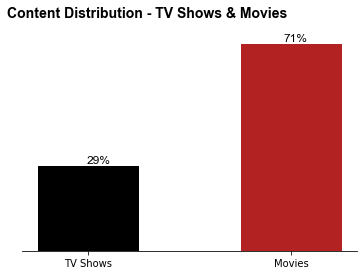

In [24]:
#Code - Calling the function tvmov_contentdes with dataframe df as input 
movie_tv_ratio = tvmov_contentdes(df)

#Bar Chart using Matplotlib
fig, ax = plt.subplots(figsize = (6,4))
ax.bar('TV Shows', movie_tv_ratio[1], color = 'black', width = 0.5)
ax.bar('Movies', movie_tv_ratio[0], color = 'firebrick', width = 0.5)

tvshow_text = str(math.ceil(movie_tv_ratio[1]*100))+"%"
movie_text = str(math.ceil(movie_tv_ratio[0]*100))+"%"

plt.text(movie_tv_ratio[1]-0.3, movie_tv_ratio[1]+0.01, tvshow_text, font= 'arial', size = 12, color = 'black')
plt.text(movie_tv_ratio[0]+0.25, movie_tv_ratio[0]+0.01, movie_text, font= 'arial', size = 12, color = 'black')

plt.text(-0.4,0.8,"Content Distribution - TV Shows & Movies", font = 'arial',weight = 'bold', size = 14)

ax.axes.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines ['bottom'].set_visible (True)

<b>2. Rating Analysis for Each Age Group - Adult Only, Teens+ & Kids+ </b>

It is noted that the majority of content on Netflix is appropriate for Adults only (48% titles), followed by appropriate for Teens and above (30% titles) and lastly appropriate for all ages and Kid friendly (22% titles).

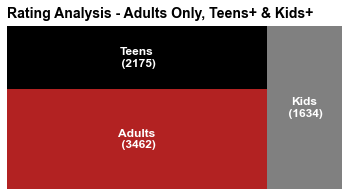

In [25]:
#Code
age_ratings = df['age_rating'].value_counts()
labels = [ str(x) + "\n (" + str(val) + ")" for x, val in age_ratings.items()]

#Square Plot using squarify
fig, ax = plt.subplots(figsize = (6,3))
squarify.plot(sizes= age_ratings.values, label = labels, color = ['firebrick', 'black','grey'],ax = ax, text_kwargs = {'font':'arial', 'fontSize':'12', 'color': 'white', 'weight':'bold'})

ax.text(0,105, 'Rating Analysis - Adults Only, Teens+ & Kids+',font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>3. Rating Analysis for TV Shows & Movies for Each Age Group </b>

It is noted that there is a difference in distribution of content via type for each age group. For both the content types, the majority of content available is appropriate for Adults only. For movies it is followed by appropriate for Teens and above and lastly appropriate for all ages and Kid friendly. However, for TV Shows, Kid friendly content is greater than content for Teens and above. Although the difference between the two is only of 30 titles.

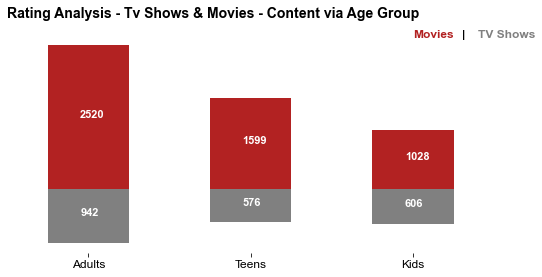

In [26]:
#Code
movietv_rating = df.groupby('type')['age_rating'].value_counts()
movie = movietv_rating.loc['Movie']
tv = - movietv_rating.loc['TV Show']

#Bar Chart using Matplotlib
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.bar(movie.index, movie, width = 0.5, color='firebrick', label='Movie')
ax.bar(tv.index, tv, width= 0.5, color='grey', label='TV Show')

plt.text(-0.05,movie[0]/2, movie[0], font= 'arial', size = 11, color = 'white', weight = 'bold')
plt.text(0.95, movie[1]/2, movie[1], font= 'arial', size = 11, color = 'white', weight = 'bold')
plt.text(1.95, movie[2]/2, movie[2], font= 'arial', size = 11, color = 'white', weight = 'bold')

plt.text(-0.05,tv[0]/2, (-tv[0]), font= 'arial', size = 11, color = 'white', weight = 'bold')
plt.text(0.95, tv[2]/2, (-tv[2]), font= 'arial', size = 11, color = 'white', weight = 'bold')
plt.text(1.95, tv[1]/2, (-tv[1]), font= 'arial', size = 11, color = 'white', weight = 'bold')

ax.set_xticks(['Adults', 'Teens', 'Kids'])
ax.set_xticklabels(['Adults', 'Teens', 'Kids'], font='arial', size = 12)
   
plt.text(-0.5,3000,"Rating Analysis - Tv Shows & Movies - Content via Age Group", font = 'arial',weight = 'bold', size = 14)

plt.text(2, 2650, 'Movies', font = 'arial', size = 12, color = 'firebrick', weight = 'bold')
plt.text(2.3, 2650, '|',font = 'arial', size = 12, color = 'black', weight = 'bold')
plt.text(2.4, 2650, 'TV Shows',font = 'arial', size = 12, color = 'grey', weight = 'bold')

ax.axes.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines ['bottom'].set_visible (False)


<b>4. Content Released vs Content Added to Netflix in a Year from 2011 to 2020 </b>

Content Added to Netflix in a year surpasses the Content Released in that particular year, this means that a lot of content which has been previously released is now being added to Netflix. Hence, it does not necessarily mean that Netflix is only adding latest content on its platform. 

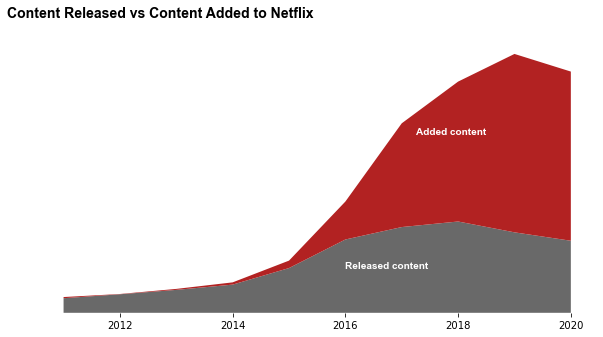

In [27]:
#Code - Calling the function rel_add_content with dataframe df as input 
year_df = rel_add_content (df)

#Stack plot using Matplotlib
fig, ax = plt.subplots(figsize = (10,5))
labels = [ 'Released content', 'Added content']

ax.stackplot(year_df.year[1:11], year_df.release_year[1:11], year_df.year_added[1:11], labels =labels, colors = ['dimgray','firebrick'], baseline = 'zero' )

ax.text(2017.25, 2000, labels[1], font ='arial', size = 10, color ='white', weight = 'bold')
ax.text(2016, 500, labels[0], font ='arial', size = 10, color ='white', weight = 'bold') 
ax.text(2010, 3300, 'Content Released vs Content Added to Netflix', font ='arial', size = 14, color ='black', weight = 'bold')

plt.box(on = None)
ax.axes.get_yaxis().set_visible(False)

<b>5. Content Released in a Year for TV Shows & Movies from 2011 to 2020 </b>

TV Shows have been gaining popularity lately and there has been a constant increase in amount of TV Shows released in a year. However, Movies surpass the TV Shows by a huge amount as represented by overall data as well, 29% is TV Shows while 71% is Movies. For Movies, there seems to be a huge impact of Covid-19, however, there seems to be no impact on TV Shows.

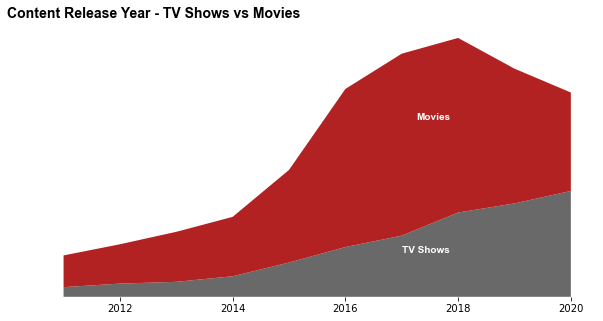

In [28]:
#Code - Calling the function rel_year with dataframe df as input 
rel_data = rel_year(df)

#Stack plot using Matplotlib
fig, ax = plt.subplots(figsize = (10,5))
labels = [ 'TV Shows', 'Movies']

ax.stackplot(rel_data.year[1:11], rel_data.Tv_count[1:11],rel_data.Movie_count[1:11],labels =labels, colors = ['dimgray','firebrick',], baseline = 'zero')

ax.text(2017.25, 700, labels[1], font ='arial', size = 10, color ='white', weight = 'bold')
ax.text(2017, 175, labels[0], font ='arial', size = 10, color ='white', weight = 'bold') 
ax.text(2010, 1100, 'Content Release Year - TV Shows vs Movies', font ='arial', size = 14, color ='black', weight = 'bold')

plt.box(on = None)
ax.axes.get_yaxis().set_visible(False)

<b>6. Content Added to Netflix in a Year for TV Shows & Movies from 2008 to 2020 </b>

It is noted that the content started being added to Netflix from 2008. TV Shows have been gaining popularity since 2015 and there has been a constant increase in amount of TV Shows added to Netflix in a year. However, Movies surpass the TV Shows by a huge amount as represented by overall data as well, 29% is TV Shows while 71% is Movies. For Movies, there seems to be a decent impact of Covid-19, however, there seems to be no impact on TV Shows.

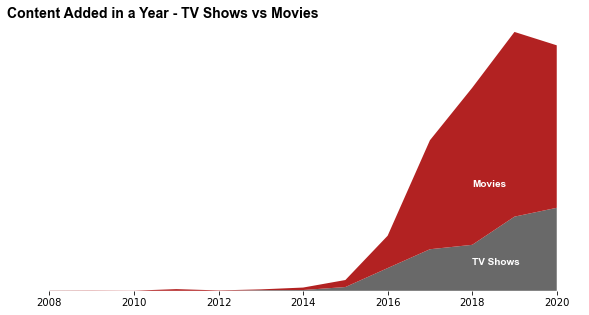

In [29]:
#Code - Calling the function cont_add with dataframe df as input 
add_data = cont_add(df)

#Stack plot using Matplotlib
fig, ax = plt.subplots(figsize = (10,5))
labels = [ 'TV Shows', 'Movies']

ax.stackplot(add_data.year[1:], add_data.Tv_count[1:], add_data.Movie_count[1:], labels =labels, colors = ['dimgray','firebrick',], baseline = 'zero')

ax.text(2018, 800, labels[1], font ='arial', size = 10, color ='white', weight = 'bold')
ax.text(2018, 200, labels[0], font ='arial', size = 10, color ='white', weight = 'bold') 
ax.text(2007, 2100, 'Content Added in a Year - TV Shows vs Movies', font ='arial', size = 14, color ='black', weight = 'bold')

plt.box(on = None)
ax.axes.get_yaxis().set_visible(False)

<b>7. Total Content Added for a Month </b>

It is noted that the maximum amount of content is added on Netflix around Christmas holidays i.e. December. Also the majority of content is added on Netflix from October to January which is essentially the majority of holiday season.

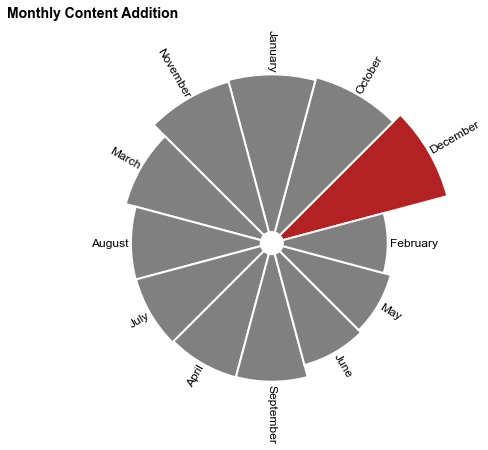

In [30]:
#counting the total number of titles added on Netflix for each month
added_month = df['month_name_added'].value_counts()

#Pie Plot using Matplotlib
fig = plt.figure(figsize=(14,7))
ax = plt.subplot(polar=True)
labels = added_month.index
colors = ['firebrick', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']
# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10
# Compute max and min in the dataset
max = added_month.max()
slope = (max - lowerLimit) / max
heights = slope * added_month.values + lowerLimit
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(added_month.index)
# Compute the angle each bar is centered on:
indexes = list(range(1, len(added_month)+1))
angles = [element * width for element in indexes]
# Draw bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, linewidth=2, edgecolor="white",color = colors )
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):
    # Labels are rotated. Rotation must be specified in degrees :
    rotation = np.rad2deg(angle)
    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    # Finally add the labels
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding, s=label, ha=alignment, va='center', rotation=rotation, 
         rotation_mode="anchor",font='arial', size = 12,color = 'black') 

fig.text(0.25,0.95,'Monthly Content Addition', font='arial', size = 14, color = 'black', weight = 'bold')

plt.axis('off')
ax.axes.get_yaxis().set_visible(False)

<b>8a. Content Producing Countries on World Map</b>

Majority of the content is produced in the countries with tones of red as color, followed by grey and white. As evident from below graph, majority of content is produced in US, followed by India, UK, Canada. There are a total of 114 countries where content is produced.

In [31]:
#colormap for world map plot
colors_cmap = ['firebrick','grey','white']
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors_cmap)

In [32]:
#Code - Calling the function contry_count with dataframe df as input 
country_df =country_count(df)

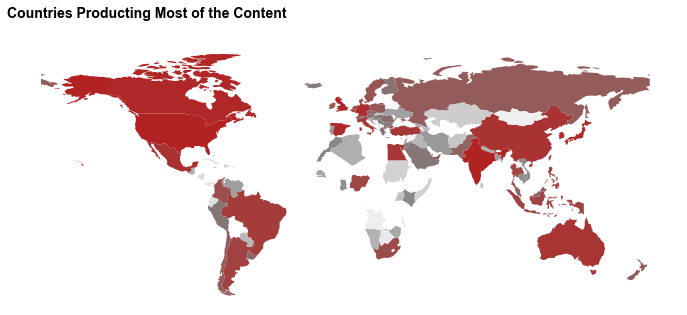

In [54]:
#Code - plotting the map and coloring it 
country_df['color'] = country_df['count'].apply(lambda x : 'firebrick' if x > country_df['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
country_df['iso_code'] = coco.convert(names=country_df['country'], to ='ISO3')
country_df = country_df[country_df['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(country_df,left_on = 'iso_a3', right_on = 'iso_code')
temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)

#Map
fig, ax  = plt.subplots(figsize = (12,6))
temp_map.dropna().plot(column = 'count', color = temp_map.dropna()['color'], cmap = cmap, scheme='quantiles', k=10, legend = False, ax = ax)

ax.text(-200,104,'Countries Producting Most of the Content', font = 'arial', size = 14, weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>8b. Top 10 Content Producing Countries </b>

For both TV Shows and Movies combined, US is the top content producing country, followed by India and UK.

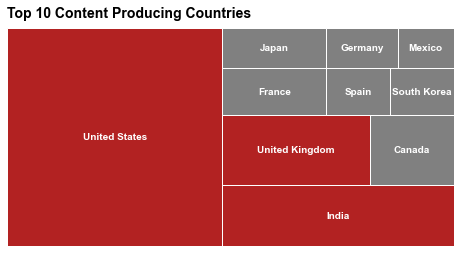

In [34]:
country_df['color'] = country_df['count'].apply(lambda x : 'firebrick' if x > country_df['count'].values[3] else 'grey')

# Squareplot using squarify
fig, ax = plt.subplots(figsize = (8,4))
bar_kawrgs = {'edgecolor':'white'}
squarify.plot(sizes= country_df['count'][0:10], label = country_df['country'][0:10], ax = ax, color = country_df['color'], **bar_kawrgs,
             text_kwargs = {'font':'arial', 'size':10, 'color':'white', 'weight': 'bold'})

ax.text(0,105,'Top 10 Content Producing Countries', font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>9a. TV Shows Producing Countries on World Map</b>

Majority of the TV Shows is produced in the countries with tones of red as color, followed by grey and white. As evident from below graph, majority of content is produced in US, followed by UK, Japan and South Korea. There are a total of 64 countries where TV Shows are produced.

In [35]:
#Code - Calling the function contry_count with dataframe df filtered for type 'TV Show' as input 
country_tv_df = country_count(df[df['type'] == 'TV Show'])

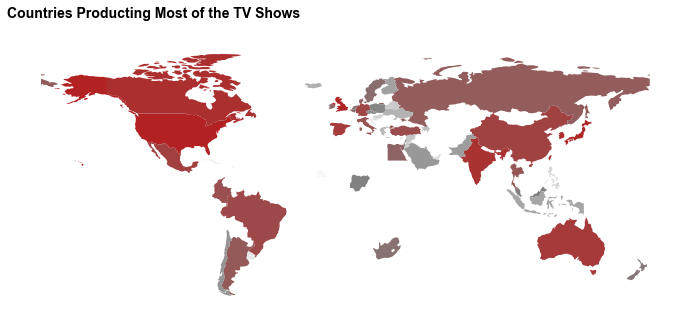

In [53]:
#Code for plotting the map and coloring it 
country_tv_df['color'] = country_tv_df['count'].apply(lambda x : 'firebrick' if x > country_tv_df['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
country_tv_df['iso_code'] = coco.convert(names=country_tv_df['country'], to ='ISO3')
country_tv_df = country_tv_df[country_tv_df['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(country_tv_df,left_on = 'iso_a3', right_on = 'iso_code')

temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)

#map
fig, ax  = plt.subplots(figsize = (12,6))
temp_map.dropna().plot(column = 'count', color = temp_map.dropna()['color'], cmap = cmap, scheme='quantiles', k=10, legend = False, ax = ax)

ax.text(-200,104,'Countries Producting Most of the TV Shows', font = 'arial', size = 14, weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>9b. Top 10 Countries Producing TV Shows</b>

For TV Shows, US is the top content producing country, followed by UK and Japan.

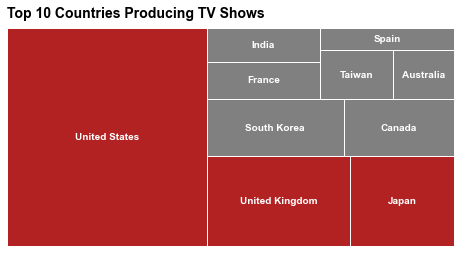

In [37]:
country_tv_df['color'] = country_tv_df['count'].apply(lambda x : 'firebrick' if x > country_tv_df['count'].values[3] else 'grey')

# Squareplot using squarify
fig, ax = plt.subplots(figsize = (8,4))

bar_kawrgs = {'edgecolor':'white'}
squarify.plot(sizes= country_tv_df['count'][0:10], label = country_tv_df['country'][0:10], ax = ax, color = country_tv_df['color'], **bar_kawrgs,
             text_kwargs = {'font':'arial', 'size':10, 'color':'white', 'weight':'bold'})

ax.text(0,105,'Top 10 Countries Producing TV Shows', font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>10a. Movies Producing Countries on World Map</b>

Majority of the Movies is produced in the countries with tones of red as color, followed by grey and white. As evident from below graph, majority of content is produced in US, followed by India, UK and Canada. There are a total of 107 countries where Movies are produced.

In [38]:
#Code - Calling the function contry_count with dataframe df filtered for type 'Movie' as input 
country_movie_df = country_count(df[df['type'] == 'Movie'])

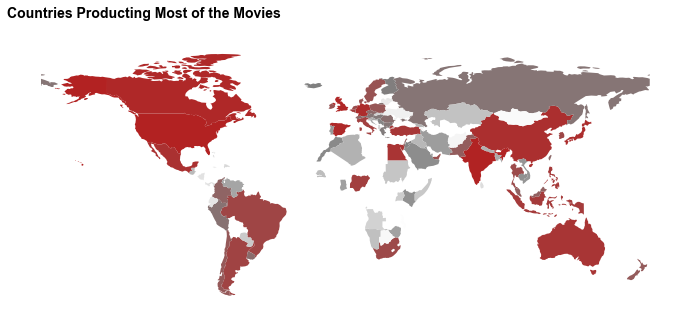

In [52]:
#Code for plotting the map and coloring it 
country_movie_df['color'] = country_movie_df['count'].apply(lambda x : 'firebrick' if x > country_movie_df['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#converting country names to iso codes
country_movie_df['iso_code'] = coco.convert(names=country_movie_df['country'], to ='ISO3')
country_movie_df = country_movie_df[country_movie_df['iso_code'] != 'not found']
# merging geodataframe and pandas dataframe
temp_map = world.merge(country_movie_df,left_on = 'iso_a3', right_on = 'iso_code')
temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)
#map
fig, ax  = plt.subplots(figsize = (12,6))
temp_map.dropna().plot(column = 'count', color = temp_map.dropna()['color'], cmap = cmap, scheme='quantiles', k=10, legend = False, ax = ax)

ax.text(-200,104,'Countries Producting Most of the Movies', font = 'arial', size = 14, weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>10b. Top 10 Countries Producing Movies</b>

For Movies, US is the top content producing country, followed by India and UK.

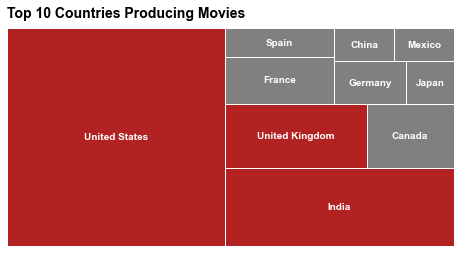

In [40]:
country_movie_df['color'] = country_movie_df['count'].apply(lambda x : 'firebrick' if x > country_movie_df['count'].values[3] else 'grey')

# squareplot using squarify
fig, ax = plt.subplots(figsize = (8,4))
bar_kawrgs = {'edgecolor':'white'}
squarify.plot(sizes= country_movie_df['count'][0:10], label = country_movie_df['country'][0:10], ax = ax, color = country_movie_df['color'], **bar_kawrgs,
             text_kwargs = {'font':'arial', 'size':10, 'color':'white', 'weight':'bold'})

ax.text(0,105,'Top 10 Countries Producing Movies', font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>11a. Top Genres for Netflix Content </b>

It is noted that there are a total of 42 Genres across Movies and TV Shows for content on Netflix. As we know the majority of content on Netflix is Movies (71%), the top genres as well belong to Movies category. Top Genres for Netflix content are International Movies, followed by Dramas, Comedies, International TV Shows and Documentaries.

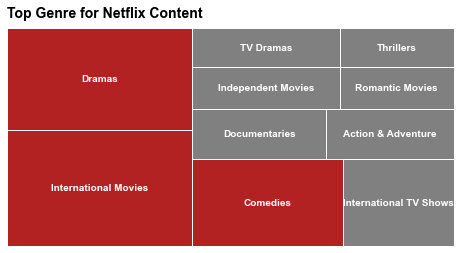

In [41]:
#Code - Calling the function genre_analysis with dataframe df as input
list_temp = genre_analysis(df)
list_temp = list_temp.sort_values(by = 'count', ascending = False).reset_index(drop = True)
list_temp['color'] = list_temp['count'].apply(lambda x : 'firebrick' if x > list_temp['count'].values[3] else 'grey')

#squareplot using squarify
fig, ax = plt.subplots(figsize = (8,4))
bar_kawrgs = {'edgecolor':'white'}
squarify.plot(sizes= list_temp['count'][0:10], label = list_temp['genre'][0:10], ax = ax, color = list_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'arial', 'size':10, 'color':'white', 'weight':'bold'})

ax.text(0,105,'Top Genre for Netflix Content', font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>11b. Genre Analysis for TV Shows & Movies </b>

It is noted that there are 22 genres for TV Shows and 20 Genres for Movies. Top Genres for TV Shows are International TV Shows, TV Dramas and TV Comedies. Top Genres for Movies are International Movies, Dramas and Comedies. So pretty much the top genre is the same across TV Shows and Movies. One thing we must note here is that majority of the content on Netflix falls in multiple genres.

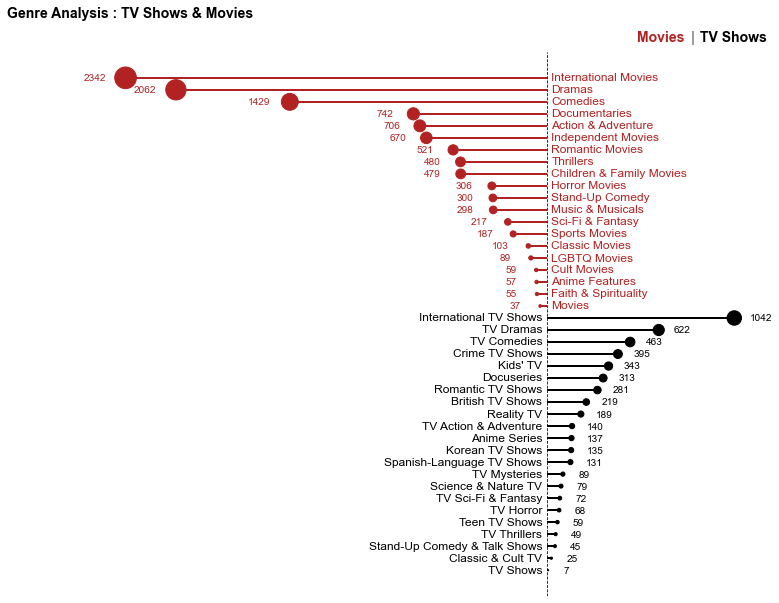

In [42]:
#Code - Calling the function genre_analysis twice with dataframe df filtered for type 'Movie' and 'TV Show' as input 
tv_genre = genre_analysis(df[df['type'] == 'TV Show'])
movie_genre = genre_analysis(df[df['type'] == 'Movie'])

#bar + scatter plot using Matplotlib
fig, ax  = plt.subplots(figsize = (12,10))

ax.barh( y = tv_genre['genre'], width = tv_genre['count'], height = 0.15, color = ['black'])
ax.scatter( y = tv_genre['genre'], x =  tv_genre['count'], s = tv_genre['count'] * 0.2, c = 'black')

ax.barh( y = movie_genre['genre'], width = - movie_genre['count'], height = 0.15, color = ['firebrick'])
ax.scatter( y = movie_genre['genre'], x =  -movie_genre['count'], s=movie_genre['count']*0.2 , c = 'firebrick')

ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':0.8, 'linestyle': '--', 'color' : 'black'})

tv_index = tv_genre['genre']
movie_index = movie_genre['genre']

tv_count = tv_genre['count']
movie_count = movie_genre['count']

for y_loc in range(0,len(tv_genre)):
        ax.text(-25, y_loc - 0.25 , tv_index[y_loc],horizontalalignment= 'right', font = 'arial', size = 12)
        ax.text(tv_count[y_loc] + 85, y_loc - 0.25, tv_count[y_loc],horizontalalignment= 'left', font = 'arial', size = 10)
              
for y_loc in range(0,len(movie_genre)):
        ax.text(25, 22+y_loc - 0.25, movie_index[y_loc],horizontalalignment = 'left', font = 'arial', size = 12, color ='firebrick')
        ax.text(-movie_count[y_loc] - 110,  22 + y_loc - 0.25 , movie_count[y_loc],horizontalalignment= 'right', font = 'arial', size = 10, color ='firebrick')
    
ax.text(-3000, 46, 'Genre Analysis : TV Shows & Movies', font = 'arial', size = 14, weight ='bold')

ax.text(500, 44, 'Movies', font = 'arial', size = 14, color = 'firebrick', weight = 'bold')
ax.text(800, 44, '|',font = 'arial', size = 14, color = 'grey', weight = 'bold')
ax.text(850, 44, 'TV Shows',font = 'arial', size = 14, color = 'black', weight = 'bold')
    
ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>12a. WordCloud for Movies based on Title </b>

It is noted that love, christmas, american, life, story, girl, live are all most used words in the title. The presence of the word 'american' resonates the fact that US is the Top content producing country for Netflix content.

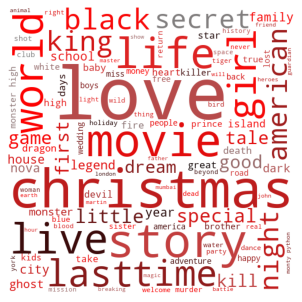

In [43]:
#Code - Calling the function wordcloud_title with dataframe df filtered for type 'Movie' as input 
wordcloud = wordcloud_title(df[df["type"] == "Movie"])

# plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

<b>12b. WordCloud for TV Shows based on Title </b>

It is noted that girl, world, love, show are all most used words in the title. 

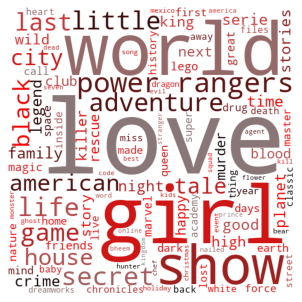

In [44]:
#code - Calling the function wordcloud_title with dataframe df filtered for type 'TV Show' as input 
wordcloud = wordcloud_title(df[df["type"] == "TV Show"])

# plot the WordCloud image
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## Objective 2 - _Visual Representation of Key Characteristics and Trends of Netflix Dataset for India_


### Explanation of Results and Visualisation

There are 6 different key charateristics and trends that we have analysed. The functions used for them are included as a part of the Program Code section. We will be explaining the results and looking at the visualisation for each one of them below. 

Dataframe 'df_india' has the dataset for Netflix filetered for content producing country as India with 990 rows and 16 colums. For this objective we will be doing all on the analysis on this dataset.

In [45]:
df_india.shape

(990, 16)

<b>1. Content Distribution - TV Shows & Movies </b>

It is noted that 8% of the content produced in India on Netflix is TV Shows and 92% is Movies. Since the more than 90% of content is Movies, we will not be dividing the analysis into Movies and TV Shows for India, rather will be looking at trends for the entire dataset.

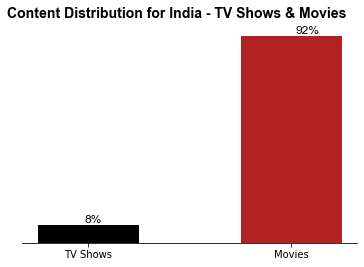

In [46]:
#Code - Calling the function tvmov_contentdes with dataframe df_india as input
movie_tv_ratio = tvmov_contentdes(df_india)

#Bar Chart using Matplotlib
fig, ax = plt.subplots(figsize = (6,4))
ax.bar('TV Shows', movie_tv_ratio[1], color = 'black', width = 0.5)
ax.bar('Movies', movie_tv_ratio[0], color = 'firebrick', width = 0.5)

tvshow_text = str(math.ceil(movie_tv_ratio[1]*100))+"%"
movie_text = str(math.ceil(movie_tv_ratio[0]*100))+"%"

plt.text(movie_tv_ratio[1]-0.1, movie_tv_ratio[1]+0.01, tvshow_text, font= 'arial', size = 12, color = 'black')
plt.text(movie_tv_ratio[0]+0.1, movie_tv_ratio[0]+0.01, movie_text, font= 'arial', size = 12, color = 'black')

plt.text(-0.4,1,"Content Distribution for India - TV Shows & Movies", font = 'arial',weight = 'bold', size = 14)

ax.axes.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines ['bottom'].set_visible (True)
              

<b>2. Rating Analysis for Each Age Group - Adult Only, Teens+ & Kids+ </b>

It is noted that the majority of content on Netflix is appropriate for Teens & above only (56% titles), followed by appropriate for Adults Only (26% titles) and lastly appropriate for all ages and Kid friendly (18% titles).

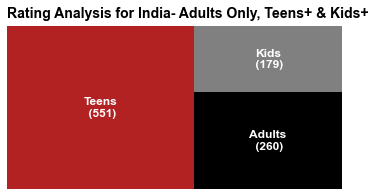

In [47]:
#code
age_ratings = df_india['age_rating'].value_counts()
labels = [ str(x) + "\n (" + str(val) + ")" for x, val in age_ratings.items()]

#squareplot using squarify
fig, ax = plt.subplots(figsize = (6,3))
squarify.plot(sizes= age_ratings.values, label = labels, color = ['firebrick', 'black','grey'], ax = ax, text_kwargs = {'font':'arial', 'fontSize':'12', 'color': 'white', 'weight':'bold'},)

ax.text(0,105, 'Rating Analysis for India- Adults Only, Teens+ & Kids+',font = 'arial', size = 14, color = 'black', weight = 'bold')
ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>3. Content Released vs Content Added to Netflix in a Year from 2011 to 2020 </b>

Content Added to Netflix in a year surpasses the Content Released in that particular year, this means that a lot of content which has been previously released is now being added to Netflix. Hence, it does not necessarily mean that Netflix is only adding latest content on its platform. For content produced in India, it started being added to Netflix from 2016. The impact of Covid-19 can be seen on both released content and added content.

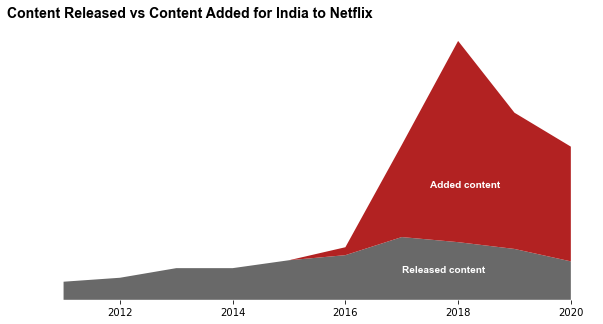

In [48]:
#Code - Calling the function rel_add_content with dataframe df_india as input  
year_df = rel_add_content (df_india)

#Stack plot using Matplotlib
fig, ax = plt.subplots(figsize = (10,5))
labels = [ 'Released content', 'Added content ']

ax.stackplot(year_df.year[1:11], year_df.release_year[1:11],year_df.year_added[1:11],labels =labels, colors = ['dimgray','firebrick',], baseline = 'zero' )

ax.text(2017.5, 200, labels[1], font ='arial', size = 10, color ='white', weight = 'bold')
ax.text(2017, 50, labels[0], font ='arial', size = 10, color ='white', weight = 'bold') 
ax.text(2010,500, 'Content Released vs Content Added for India to Netflix', font ='arial', size = 14, color ='black', weight = 'bold')

plt.box(on = None)
ax.axes.get_yaxis().set_visible(False)

<b>4. Total Content Added for a Month </b>

It is noted that the maximum amount of content is added on Netflix around Christmas holidays i.e. December. Also a lot of India produced content is added in October and March as these are the festival months for India during which Diwali, Holi and Eid are celebrated.

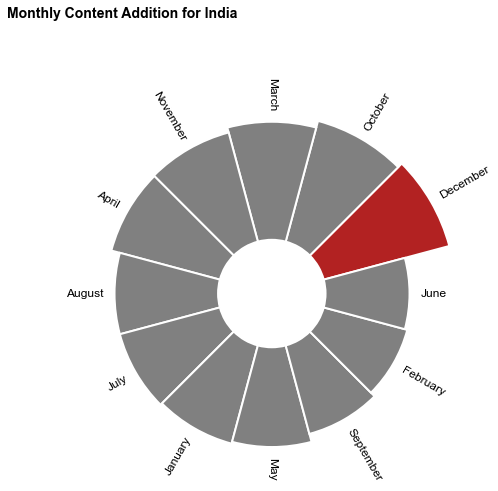

In [49]:
#counting the total number of titles added on Netflix for each month
added_month = df_india['month_name_added'].value_counts()

# Pie chart using Matplotlib
fig = plt.figure(figsize=(14,7))
ax = plt.subplot(polar=True)

## labels
labels = added_month.index
colors = ['firebrick', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']
# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10
# Compute max and min in the dataset
max = added_month.max()
slope = (max - lowerLimit) / max
heights = slope * added_month.values + lowerLimit
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(added_month.index)
# Compute the angle each bar is centered on:
indexes = list(range(1, len(added_month)+1))
angles = [element * width for element in indexes]
# Draw bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, linewidth=2, edgecolor="white",color = colors )
# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):
    # Labels are rotated. Rotation must be specified in degrees :
    rotation = np.rad2deg(angle)
    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    # Finally add the labels
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding, s=label, ha=alignment, va='center', rotation=rotation, 
         rotation_mode="anchor",font='arial', size = 12,color = 'black') 

fig.text(0.25,1.05,'Monthly Content Addition for India', font='arial', size = 14,color = 'black', weight = 'bold')

plt.axis('off')
ax.axes.get_yaxis().set_visible(False)

<b>5. Top Genres for Netflix Content </b>

It is noted that there are a total of 35 Genres across Movies and TV Shows for content produced in India on Netflix. As we know the majority of content is Movies (92%), the top genres as well belong to Movies category. Top Genres for Netflix content are International Movies, followed by Dramas, Comedies. The first TV Show related genre is at no. 9 'International TV Shows'. The content produced in India is also multi genre content.

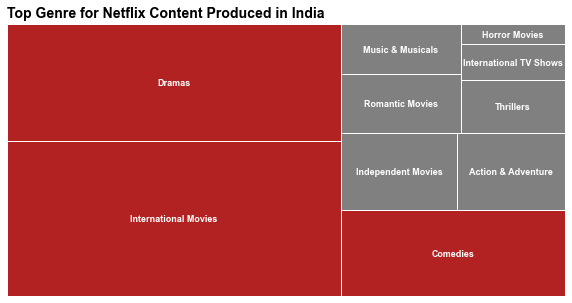

In [50]:
#Code - Calling the function genre_analysis with dataframe df_india as input
list_temp = genre_analysis(df_india) 
list_temp = list_temp.sort_values(by = 'count', ascending = False).reset_index(drop = True)
list_temp['color'] = list_temp['count'].apply(lambda x : 'firebrick' if x > list_temp['count'].values[3] else 'grey')

#squareplot
fig, ax = plt.subplots(figsize = (10,5))
bar_kawrgs = {'edgecolor':'white'}
squarify.plot(sizes= list_temp['count'][0:10], label = list_temp['genre'][0:10], ax = ax, color = list_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'arial', 'size':9, 'color':'white', 'weight':'bold'})

ax.text(0,102.5,'Top Genre for Netflix Content Produced in India', font = 'arial', size = 14, color = 'black', weight = 'bold')

ax.axis('off')
ax.spines ['bottom'].set_visible (True)

<b>6. WordCloud for India Produced Content based on Title </b>

It is noted that love, mumbai, pyaar, singh, story, India are all most used words in the title. We can see the presence of hindi words (pyaar, hindi, khoon) and Indian origin (singh, India) related words which resonates with the fact that content is produced in India

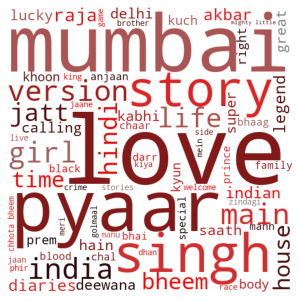

In [51]:
##ode - Calling the function wordcloud_title with dataframe df_india as input 
wordcloud = wordcloud_title(df_india)

# plot the WordCloud image
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Conclusion

### Achievements

As expected the Movies form a higher percentage of content. The impact of Covid-19 was also in lines with the expectation. Less content was added as well as released during Covid-19. For content produced in India, TV Shows contribute 8% which is also inline with expectations as majority of the TV Show content is run by TV Channels and they are daily shows which go on for multiple years, hence they are not yet on Netflix. However, lately there is an increased focus on content produced in India for Netflix, with Netflix signing exclusive deals with Indian directors and production houses. All the other trends and characteristics are pretty much what we would have expected.

### Limitations

The dataset is generated using Flixable, which denotes the Netflix titles which are live in a particular region. By analysing the dataset it seems that the dataset owner on Kaggle, picked the Netflix titles for US. This is evident from the analysis and we can see the vast majority of content is US based. Hence, the analysis for content produced in India is for the content which is currently available in US. This may not represent the appropriate picture of Netflix content in India. Similar logic applies to other countries as well. 
Also Netflix keeps on removing a lot of titles as well, this presents the trends and characteristics as of a particular date.

### Future Work

In future, I would like to work on a recommendation system for Netflix based on features like cast, director, country, genre. Also would like to study the viewership patterns for Netflix and understand the differences between TV Shows and Movies as well as different countries. Also would like to study the increase in popularity of TV Shows and why did Covid-19 did not adversely impact the TV Show release and addition to Netflix.